<a href="https://colab.research.google.com/github/somosnlp/llm-arena/blob/main/Longitud_media_de_los_prompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Longitud media de los prompts

In [1]:
# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Paso 2: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
# Paso 3: Cargar el archivo CSV (ajusta el nombre si es necesario)
ruta_csv = '/content/dataset_preferencias_dpo_v0.csv'  # asegúrate de haberlo subido
df = pd.read_csv(ruta_csv)

# Calcular longitud de cada prompt
df['prompt_length'] = df['question'].astype(str).apply(len)

# Agrupar por país y calcular longitud media
longitud_por_pais = df.groupby('country')['prompt_length'].mean().round(2).reset_index()
longitud_por_pais = longitud_por_pais.sort_values(by='prompt_length', ascending=False)


In [5]:
# Paso 4: Crear carpeta en Drive (si no existe)
output_dir = '/content/drive/MyDrive/graficos_dpo'
os.makedirs(output_dir, exist_ok=True)

# Definir ruta final del gráfico
output_path = os.path.join(output_dir, 'longitud_prompts_por_pais.jpg')


Gráfico guardado en: /content/drive/MyDrive/graficos_dpo/longitud_prompts_por_pais.jpg


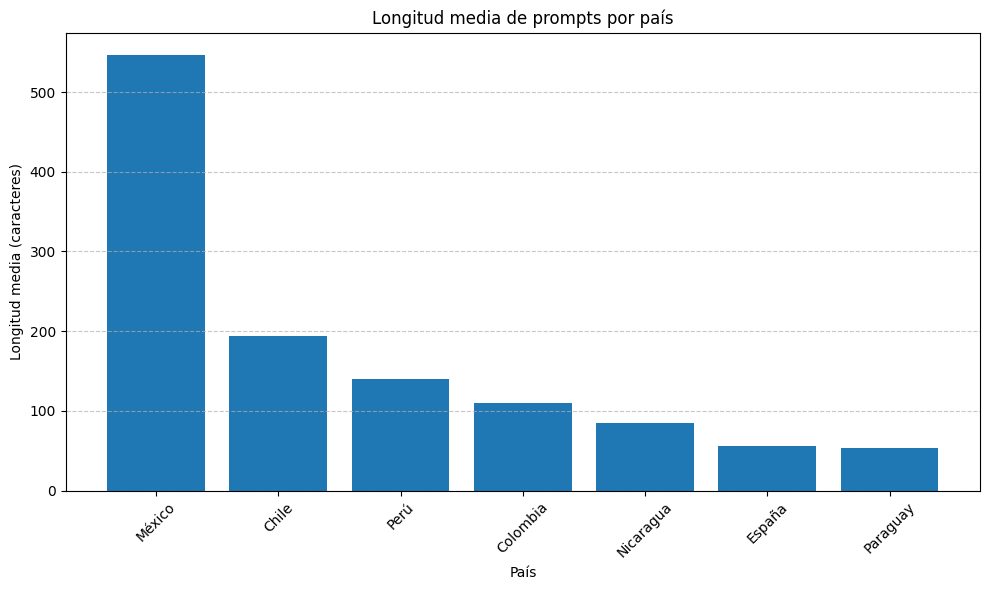

In [6]:
# Paso 5: Crear el gráfico y guardarlo
plt.figure(figsize=(10, 6))
plt.bar(longitud_por_pais['country'], longitud_por_pais['prompt_length'])
plt.title('Longitud media de prompts por país')
plt.xlabel('País')
plt.ylabel('Longitud media (caracteres)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(output_path, dpi=300)

print(f'Gráfico guardado en: {output_path}')
